##  Importing Dependencies
   We shall start by importing all the neccessary libraries. I will explain the exact use of each library later in this notebook.

#### We will be using the following libraries in this task:

- Pandas: Pandas is the most widely used data storage and manipulation library. We import, store, process and save our data in the form of Pandas DataFrames.


- NumPy: Numpy is the python library to store and form n-dimensional arrays which are used to build, train and test machine learning models.


- Matplotlib and Seaborn: These two libraries are used for data visualization. Matplotlib makes graphs of all sorts, and seaborn is an extension to it to make graphs more visually appealing.


- SciKitLearn: SKlearn is a data preprocessing library which we would use for train test splits and data scaling.


- Tensorflow and Keras: Tensorflow is the most powerful library for deep learning tasks with built in methods to train and test models. Keras is a high-level Tensorflow API to build and run deep learning models with ease and lesser code.

- NLTK: NLTK is an NLP library with all the relevant functions. We use this to preprocess the news by removing stopwords.

- GloVe: GloVe is a pre-trained NLP model which maps textual data into vectors. This is important since the machine learning model cannot directly understand the text, and GloVe enables it to be contextualized and processed in numerical form.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from keras.utils import plot_model


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Tensorflow Version 2.3.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
'''gpu_options = tf.compat.v1.GPUOptions(visible_device_list="0")
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

if tf.test.gpu_device_name(): 

    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")
    
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()'''

'gpu_options = tf.compat.v1.GPUOptions(visible_device_list="0")\nsess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))\n\nif tf.test.gpu_device_name(): \n\n    print(\'Default GPU Device: {}\'.format(tf.test.gpu_device_name()))\n\nelse:\n\n    print("Please install GPU version of TF")\n    \nfrom tensorflow.python.client import device_lib\nprint(device_lib.list_local_devices())\n\nphysical_devices = tf.config.list_physical_devices(\'GPU\')\nprint("Num GPUs:", len(physical_devices))\n\nfrom tensorflow.python.client import device_lib\n\ndef get_available_gpus():\n    local_device_protos = device_lib.list_local_devices()\n    return [x.name for x in local_device_protos if x.device_type == \'GPU\']\n\nget_available_gpus()'

#  Dataset Preprocessing
In this notebook, we use news data scraped from DAWN and Business Recorder websites using Selenium package on python. The final CSV has news with their respected dates.

In [3]:
def load_data(filename):
    
    df = pd.read_csv(filename)
    df = df.dropna()
    df = df.reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by=['Date'])
    df = df.reset_index()
    df = df.drop(columns=['level_0','index'])
    return df
    
df = load_data('Input/Cleaned Data/MCB PA Equity.csv')
df.describe()

,Sentiment,neg,neu,pos,compound,Polarity,Cum
count,36067.000000,36067.000000,36067.000000,36067.000000,36067.000000,36067.000000,36067.000000
mean,0.033216,0.095134,0.822638,0.082227,0.009924,0.033216,0.033216
std,0.761503,0.147295,0.160909,0.112188,0.470838,0.761503,0.761503
min,-1.000000,0.000000,0.000000,0.000000,-0.982600,-1.000000,-1.000000
25%,-1.000000,0.000000,0.724000,0.000000,-0.361200,-1.000000,-1.000000
50%,0.000000,0.000000,0.842000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.161000,1.000000,0.142000,0.401900,1.000000,1.000000
max,1.000000,0.895000,1.000000,0.826000,0.989700,1.000000,1.000000


The data was feature engineered and has different columns with the following interpretation:

- Polarity: The price change on the date news was published as positive (1), neutral (0) and negative (-1).
- Sentiment: Sentiment generated and engineered from Vader (NLTK Corpus) as good (1), neutral (0) and bad (-1)
- neg: The probability of news being negative (generated from Vader).
- neu: The probability of news being neutral (generated from Vader).
- pos: The probability of news being positive (generated from Vader).
- compound: The compound score of news being negative, neutral or positive scaled between -1 and 1 (generated from Vader).
- Cum: The cumulative score of the news engineered from Polarity and Sentiment.

In [4]:
df.describe()

,Sentiment,neg,neu,pos,compound,Polarity,Cum
count,36067.000000,36067.000000,36067.000000,36067.000000,36067.000000,36067.000000,36067.000000
mean,0.033216,0.095134,0.822638,0.082227,0.009924,0.033216,0.033216
std,0.761503,0.147295,0.160909,0.112188,0.470838,0.761503,0.761503
min,-1.000000,0.000000,0.000000,0.000000,-0.982600,-1.000000,-1.000000
25%,-1.000000,0.000000,0.724000,0.000000,-0.361200,-1.000000,-1.000000
50%,0.000000,0.000000,0.842000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.161000,1.000000,0.142000,0.401900,1.000000,1.000000
max,1.000000,0.895000,1.000000,0.826000,0.989700,1.000000,1.000000


Here, we can see and visualize the counts of all types of news in our data set.

In [5]:
df['Polarity'].value_counts()


 0    15113
 1    11076
-1     9878
Name: Polarity, dtype: int64

Positive: 11076 , Negative: 9878 , Neutral: 15113


Text(0.5, 1.0, 'Sentiment Data Distribution')

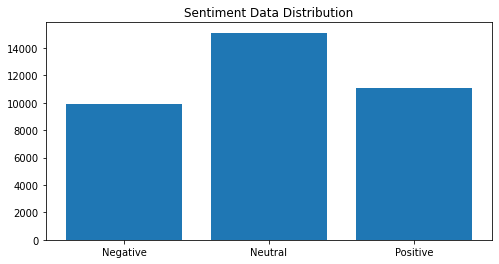

In [6]:
plt.figure(figsize=(8,4))
count_pos = df['Polarity'].value_counts()[1]
count_ntl = df['Polarity'].value_counts()[0]
count_neg = df['Polarity'].value_counts()[-1]

print('Positive:', count_pos, ',', 'Negative:', count_neg, ',', 'Neutral:', count_ntl)

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

It's a very good dataset without any skewness. 

Now let us explore the data we hhave by checking a random sample.

In [7]:
import random
random_idx_list = [random.randint(1,len(df)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,Date,News,Sentiment,neg,neu,pos,compound,Polarity,Cum
8782,2015-04-22,‘There was no religious affairs ministry in Qu...,0,0.216,0.784,0.000,-0.2960,0,0
34091,2021-03-25,Experts suggest growing better yielding crops ...,0,0.155,0.693,0.152,-0.0258,0,0
34864,2021-05-01,"NAB believes in ‘Zero Corruption, 100pc Develo...",1,0.000,0.887,0.113,0.5106,1,1
36041,2021-12-05,Eid to be observed across Pakistan on Thursday...,0,0.000,1.000,0.000,0.0000,0,0
15066,2017-06-14,"Don't be ashamed if you can't speak English, s...",1,0.000,0.846,0.154,0.3724,1,1
26762,2020-04-17,COVID-19: Ajmal Wazir urges people to keep soc...,1,0.000,0.803,0.197,0.7964,1,1
26537,2020-04-12,"COVID-19 cases increasing, adopt SOPs: DC - Ch...",1,0.000,0.863,0.137,0.5106,1,1
29982,2020-09-22,Poor law & order situation: IHC gives PM's adv...,-1,0.097,0.903,0.000,-0.4767,-1,-1
3087,2013-03-07,Ishratul Ibad meets British High Commissioner,0,0.000,1.000,0.000,0.0000,0,0
12529,2016-07-09,Govt appoints trusted legal expert as law secr...,1,0.000,0.566,0.434,0.5574,1,1


### Stemming/ Lematization
For grammatical reasons, documents are going to use different forms of a word, such as *write, writing and writes.* Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes. 

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word
![Stemming and Lematization](https://qph.fs.quoracdn.net/main-qimg-cd7f4bafaa42639deb999b1580bea69f)

### Hyperlinks and Mentions
News may have tags and hyperlinks in them which may not come in our use so it is important to remove them.

### Stopwords
Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some stopwords are...
![Stopwords English](https://4.bp.blogspot.com/-yiEr-jCVv38/Wmk10d84DYI/AAAAAAAAk0o/IfgjfjpgrxM5NosUQrGw7PtLvgr6DAG8ACLcBGAs/s1600/Screen%2BShot%2B2018-01-24%2Bat%2B5.41.21%2BPM.png)


**NLTK** is a python library which got functions to perform text processing task for NLP.



In [8]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [9]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [10]:
def preprocesser(df):
    df.text = df['News'].apply(lambda x: preprocess(x))
    return df

df = preprocesser(df)

C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [11]:
df.tail()

,Date,News,Sentiment,neg,neu,pos,compound,Polarity,Cum
36062,2021-12-05,Controlling street crimes top priority: Karach...,0,0.0,0.924,0.076,0.2023,0,0
36063,2021-12-05,"Covid-19: ICUs, HDUs fully occupied at LUMHS H...",0,0.0,1.000,0.000,0.0000,0,0
36064,2021-12-05,Mega-scheme for Karachi: Sindh govt releases R...,0,0.0,1.000,0.000,0.0000,0,0
36065,2021-12-05,The Weather - KARACHI: The weather report on T...,0,0.0,1.000,0.000,0.0000,0,0
36066,2021-12-05,NAB for placing Shehbaz's name on ECL - LAHORE...,0,0.0,1.000,0.000,0.0000,0,0




### Positive Words

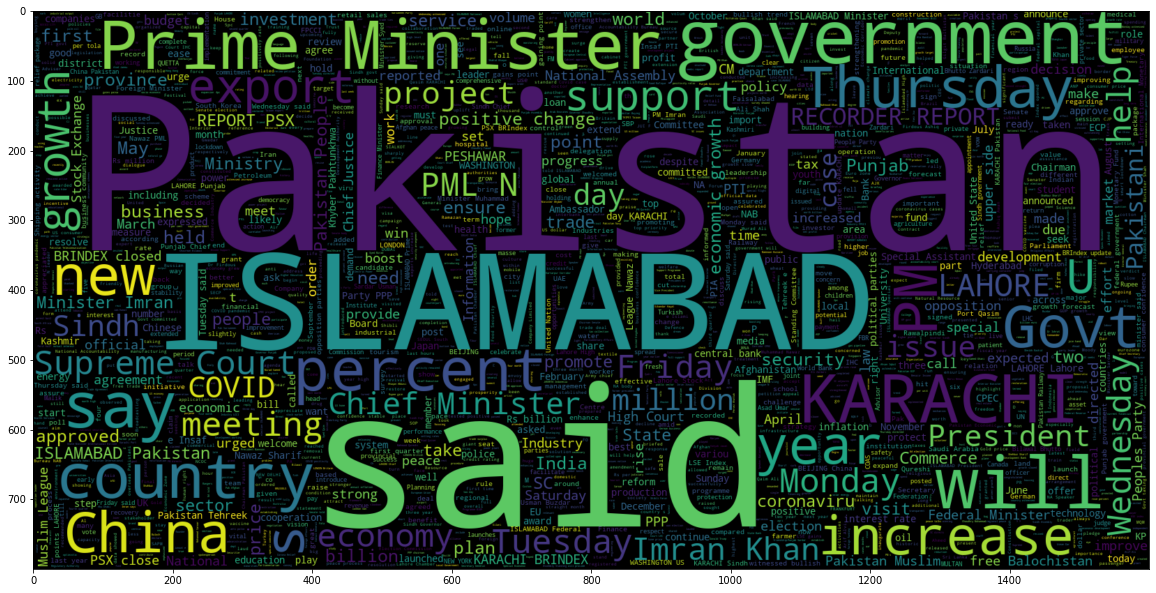

In [12]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 

temp = df.sort_values(by=['Polarity'], ascending = False)
#print(temp[0:count_pos+4])
text = ' '.join(temp["News"][0:count_pos])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

### Neutral Words

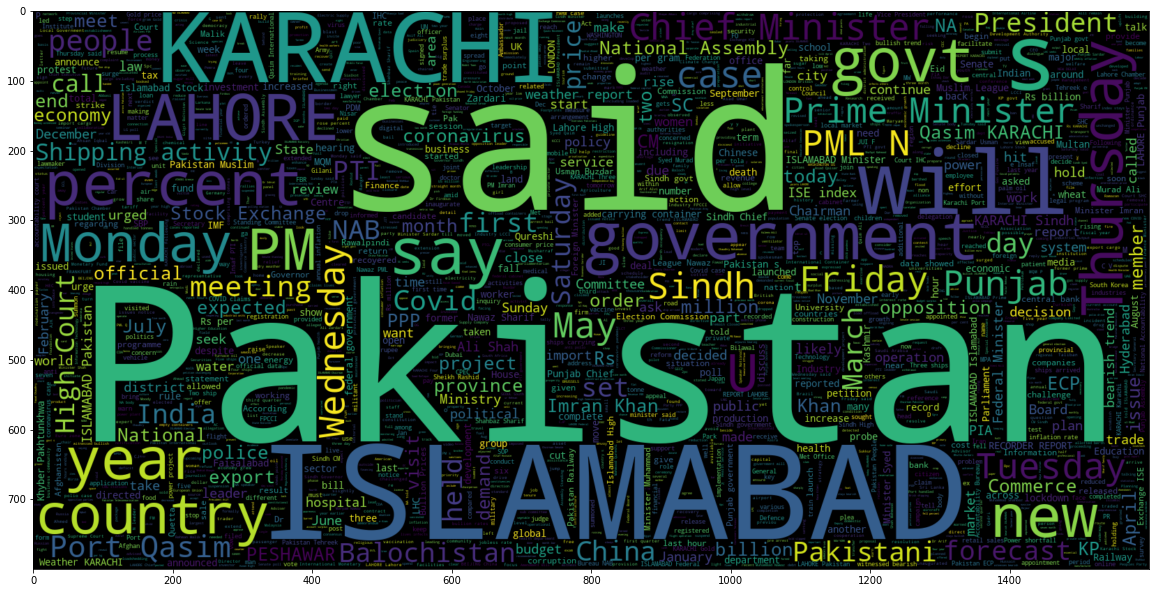

In [13]:
plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
#print(temp[count_pos:count_pos + count_ntl])
text = ' '.join(temp["News"][count_pos:count_pos + count_ntl])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

### Negative Words

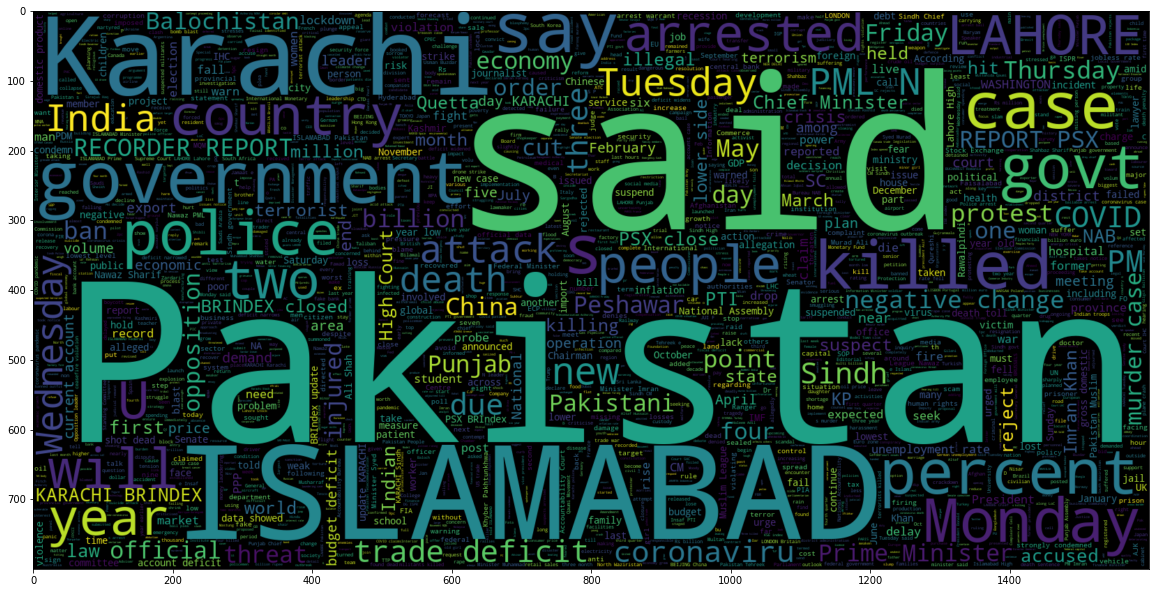

In [14]:
plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
#print(temp[count_pos + count_ntl:])
text = ' '.join(temp["News"][count_pos + count_ntl:])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

## Train and Test Split

We split our data in 2 sets, train consisting of 70% data and test consisting of 30% data.

In [15]:
TRAIN_SIZE = 0.3
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 100

def _train_test_split(df, TRAIN_SIZE):
    
    train_data, dump = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=7) # Splits Dataset into Training and Testing set
    test_data = df.iloc[int(len(df)*0.3):]
    
    return train_data, test_data

train_data, test_data = _train_test_split(df, TRAIN_SIZE)

In [16]:
print(train_data.shape, test_data.shape)

(10820, 9) (25247, 9)


`train_test_split` will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.

In [17]:
train_data.describe()


,Sentiment,neg,neu,pos,compound,Polarity,Cum
count,10820.000000,10820.000000,10820.000000,10820.000000,10820.000000,10820.000000,10820.000000
mean,0.022274,0.095827,0.822444,0.081729,0.003642,0.022274,0.022274
std,0.761250,0.147540,0.162444,0.113079,0.470837,0.761250,0.761250
min,-1.000000,0.000000,0.000000,0.000000,-0.982600,-1.000000,-1.000000
25%,-1.000000,0.000000,0.722000,0.000000,-0.381800,-1.000000,-1.000000
50%,0.000000,0.000000,0.843000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.163000,1.000000,0.141000,0.381800,1.000000,1.000000
max,1.000000,0.783000,1.000000,0.826000,0.989700,1.000000,1.000000


# Tokenization


In [18]:
from keras.preprocessing.text import Tokenizer

def tokenize(train_data):
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data['News'])

    word_index = tokenizer.word_index
    vocab_size = len(tokenizer.word_index) + 1
    return tokenizer, word_index, vocab_size

tokenizer, word_index, vocab_size = tokenize(train_data)
    

In [19]:
from keras.preprocessing.sequence import pad_sequences

def sequence_padder(train_data, MAX_SEQUENCE_LENGTH):

    x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['News']),
                            maxlen = MAX_SEQUENCE_LENGTH)
    x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['News']),
                           maxlen = MAX_SEQUENCE_LENGTH)
    
    return x_train, x_test

x_train, x_test = sequence_padder(train_data, MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (10820, 100)
Testing X Shape: (25247, 100)


### Label Encoding 
We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [20]:
from keras.utils.np_utils import to_categorical

def encode_labels(train_data, test_data):
    
    train_labels = to_categorical(train_data['Polarity'], num_classes=3)
    test_labels = to_categorical(test_data['Polarity'], num_classes=3)
    #labels = np.argmax(labels, axis=1)
    y_train = train_labels
    y_test = test_labels
    return train_labels, test_labels, y_train, y_test

train_labels, test_labels, y_train, y_test = encode_labels(train_data, test_data)

# Word Emdedding


In [21]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip


In [22]:
GLOVE_EMB = 'Input/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 1
MODEL_PATH = 'best_model.hdf5'

In [23]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [24]:
def embedder(EMBEDDING_DIM, vocab_size):
    embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    for word, i in word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                              EMBEDDING_DIM,
                                              weights=[embedding_matrix],
                                              input_length=MAX_SEQUENCE_LENGTH,
                                              trainable=False)
    return embedding_layer

embedding_layer = embedder(EMBEDDING_DIM, vocab_size)

# Model Training - BiDirectional LSTM and Single layer CNN


In [25]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential

In [26]:
def create_model(MAX_SEQUENCE_LENGTH, embedding_layer):
    
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    #x = Sequential()
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Conv1D(64, 5)(x)
    x = Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2))(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(3, activation='sigmoid')(x)
    print(outputs)
    model = tf.keras.Model(sequence_input, outputs)
    
    return model

model = create_model(MAX_SEQUENCE_LENGTH, embedding_layer)

#plot_model(model)
print(model.summary())

Tensor("dense_2/Sigmoid:0", shape=(None, 3), dtype=float32)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          5872500   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 300)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 64)            96064     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
____________________________________________________________

The model has 1 embedding layer, 1 Convolutional 1D layer with 96,064 parameters, 1 BiDirectional LSTM layer with 24,832 parameters and 2 dense layers with 512 neurons, ReLU activation and 33,280 and 26,2656 parameters each. The final dense layer has 3 output dimensions (good, neutral, bad), Sigmoid activation with 1,539 parameters. There are several dropouts of 20% to ensure there is no overfitting. 

There are a total of 3,619,071 parameters of which 418,371 are trainable (LSTM and Dense).



### Callbacks


In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

def compiler(model, LR):
    
    model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
                  metrics=['acc'])
    ReduceLROnPlateau_ = ReduceLROnPlateau(factor=0.1,
                                         min_lr = 0.01,
                                         monitor = 'val_loss',
                                         verbose = 1)
    
    return model, ReduceLROnPlateau_

model, ReduceLROnPlateau_ = compiler(model, LR)

In [28]:
gpu_options = tf.compat.v1.GPUOptions(visible_device_list="1")
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

if tf.test.gpu_device_name(): 

    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Please install GPU version of TF


In [29]:
def fit_model(model, x_train, y_train, BATCH_SIZE, EPOCHS, x_test, y_test):

    history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                        validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau_], verbose = 1)
    
    return history

history = fit_model(model, x_train, y_train, BATCH_SIZE, EPOCHS, x_test, y_test)
    

339/339 [==============================] - 78s 230ms/step - loss: 0.5491 - acc: 0.5485 - val_loss: 0.4821 - val_acc: 0.6403


In [30]:
import tensorflow.keras.models

model.save('temp.h5')
model = tf.keras.models.load_model('temp' + '.h5')


# Model Evaluation


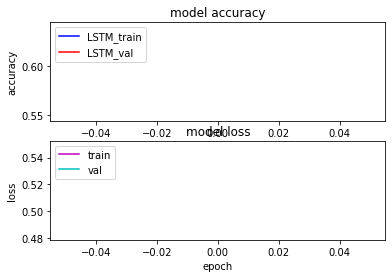

In [31]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['acc'], c= 'b')
at.plot(history.history['val_acc'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [32]:
def decode_sentiment(score):
    if score[0] > score[1] and score[0] > score[2]:
        #print(score[0], '0\n---')
        return 0
    elif score[1] > score[0] and score[1] > score[2]:
        #print(score[1], '1\n---')
        return 1
    elif score[2] > score[0] and score[2] > score[1]:
        #print(score[2], '-1\n---')
        return -1

def sentiment_decoder(model, x_test):
    
    scores = model.predict(x_test, verbose=0, batch_size=10)
    y_pred_1d = [decode_sentiment(score) for score in scores]
    
    return scores, y_pred_1d

scores, y_pred_1d = sentiment_decoder(model, x_test)
    

In [33]:
len(y_pred_1d)

25247

### Confusion Matrix
Confusion Matrix provide a nice overlook at the model's performance in classification task

In [34]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

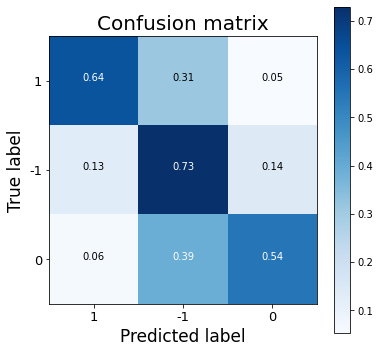

In [35]:
def cnf_plotter(test_data, y_pred_1d):

    cnf_matrix = confusion_matrix(test_data['Polarity'].to_list(), y_pred_1d)
    plt.figure(figsize=(6,6))
    plot_confusion_matrix(cnf_matrix, classes=test_data['Polarity'].unique(), title="Confusion matrix")
    plt.show()
    
cnf_plotter(test_data, y_pred_1d)

### Classification Scores

In [36]:
print(classification_report(list(test_data['Polarity']), y_pred_1d))

              precision    recall  f1-score   support

          -1       0.72      0.64      0.68      7176
           0       0.55      0.73      0.63      9548
           1       0.73      0.54      0.62      8523

    accuracy                           0.64     25247
   macro avg       0.67      0.64      0.64     25247
weighted avg       0.66      0.64      0.64     25247



In [37]:
tf.version.VERSION

'2.3.0'

### Run on 100 files

In [42]:
KSE100 = pd.read_csv('Input/KSE100.csv')

for i in range(11, len(KSE100)):
    
    print('Iteration:', i)
    name = KSE100['Ticker'][i]
    print(name)
    load_name = 'Input/Cleaned Data/' + name +'.csv'
    load_name_tech = 'Output/Indicators/' + name +'.csv'
    
    df = load_data(load_name)
    df = preprocesser(df)
    
    train_data, test_data = _train_test_split(df, TRAIN_SIZE)
    tokenizer, word_index, vocab_size = tokenize(train_data)
    x_train, x_test = sequence_padder(train_data, MAX_SEQUENCE_LENGTH)
    train_label, test_labels, y_train, y_test = encode_labels(train_data, test_data)
    
    embedding_layer = embedder(EMBEDDING_DIM, vocab_size)
    
    model = create_model(MAX_SEQUENCE_LENGTH, embedding_layer)
    model, ReduceLROnPlateau_ = compiler(model, LR)
    history = fit_model(model, x_train, y_train, BATCH_SIZE, EPOCHS, x_test, y_test)
    
    #model.save('Models/' + name + '.h5')
    
    #model = tf.keras.models.load_model('Models/' + name + '.h5')
    
    scores, y_pred_1d = sentiment_decoder(model, x_test)
    
    #cnf_plotter(test_data, y_pred_1d)
    #print(classification_report(list(test_data['Polarity']), y_pred_1d))
    
    output = df.iloc[int(len(df)*TRAIN_SIZE):]
    output['Pred'] = y_pred_1d
    output = output.reset_index(drop=True)
    pred = pd.read_csv(load_name_tech)
    pred['Date'] = pd.to_datetime(pred['Date']) 
    start_date = output['Date'][0]
    end_date = pred['Date'][len(pred)-1]

    start = len(pred) - len(output)
    pred = pred.iloc[start:]
    #end = output.index[output['Date'] == end_date].to_list()[0]
    #output = output.iloc[:end]
    
    temp = output.groupby(['Date'], as_index = False).mean()

    pred['Score'] = [0 for i in range(len(pred))]

    for j in range(len(temp)):

        date = temp['Date'][j]

        index = pred.index[pred['Date'] == date]

        pred['Score'][index] = temp['Pred'][j]

    pred.to_csv(path_or_buf = 'Output/' + name + '.csv', index = False) #Save dataframe as CSV

Iteration: 11
DGKC PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_89/Sigmoid:0", shape=(None, 3), dtype=float32)
290/290 [==============================] - 78s 269ms/step - loss: 0.2184 - acc: 0.8952 - val_loss: 0.1696 - val_acc: 0.9068


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 12
POL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_92/Sigmoid:0", shape=(None, 3), dtype=float32)
299/299 [==============================] - 72s 242ms/step - loss: 0.2159 - acc: 0.8965 - val_loss: 0.1521 - val_acc: 0.9273.2189 - acc: - ETA: 


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 13
EFERT PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_95/Sigmoid:0", shape=(None, 3), dtype=float32)
405/405 [==============================] - 112s 277ms/step - loss: 0.1261 - acc: 0.9501 - val_loss: 0.1134 - val_acc: 0.9493


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 14
KAPCO PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_98/Sigmoid:0", shape=(None, 3), dtype=float32)
302/302 [==============================] - 83s 275ms/step - loss: 0.2134 - acc: 0.8965 - val_loss: 0.1877 - val_acc: 0.9080


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 15
NBP PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_101/Sigmoid:0", shape=(None, 3), dtype=float32)
303/303 [==============================] - 66s 218ms/step - loss: 0.2155 - acc: 0.9009 - val_loss: 0.1537 - val_acc: 0.9458


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 16
NESTLE PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_104/Sigmoid:0", shape=(None, 3), dtype=float32)
599/599 [==============================] - 150s 251ms/step - loss: 0.1016 - acc: 0.9660 - val_loss: 0.0363 - val_acc: 0.9908


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 17
SEARL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_107/Sigmoid:0", shape=(None, 3), dtype=float32)
324/324 [==============================] - 80s 247ms/step - loss: 0.1571 - acc: 0.9317 - val_loss: 0.1612 - val_acc: 0.9155


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 18
BAHL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_110/Sigmoid:0", shape=(None, 3), dtype=float32)
323/323 [==============================] - 79s 245ms/step - loss: 0.1800 - acc: 0.9200 - val_loss: 0.1484 - val_acc: 0.9289


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 19
FCCL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_113/Sigmoid:0", shape=(None, 3), dtype=float32)
307/307 [==============================] - 80s 259ms/step - loss: 0.2115 - acc: 0.8996 - val_loss: 0.1714 - val_acc: 0.9074


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 20
MLCF PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_116/Sigmoid:0", shape=(None, 3), dtype=float32)
286/286 [==============================] - 74s 260ms/step - loss: 0.2219 - acc: 0.8950 - val_loss: 0.1834 - val_acc: 0.8972s - loss


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 21
KEL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_119/Sigmoid:0", shape=(None, 3), dtype=float32)
444/444 [==============================] - 114s 257ms/step - loss: 0.1596 - acc: 0.9337 - val_loss: 0.0486 - val_acc: 0.9924


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 22
PSEL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_122/Sigmoid:0", shape=(None, 3), dtype=float32)
881/881 [==============================] - 206s 234ms/step - loss: 0.0438 - acc: 0.9895 - val_loss: 0.0028 - val_acc: 1.0000


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 23
PIBTL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_125/Sigmoid:0", shape=(None, 3), dtype=float32)
460/460 [==============================] - 114s 247ms/step - loss: 0.1320 - acc: 0.9500 - val_loss: 0.0805 - val_acc: 0.9736


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 24
PKGS PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_128/Sigmoid:0", shape=(None, 3), dtype=float32)
298/298 [==============================] - 73s 246ms/step - loss: 0.2300 - acc: 0.8927 - val_loss: 0.1559 - val_acc: 0.9256


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 25
NML PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_131/Sigmoid:0", shape=(None, 3), dtype=float32)
272/272 [==============================] - 73s 269ms/step - loss: 0.2349 - acc: 0.8854 - val_loss: 0.1742 - val_acc: 0.9092


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 26
BAFL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_134/Sigmoid:0", shape=(None, 3), dtype=float32)
316/316 [==============================] - 75s 238ms/step - loss: 0.1770 - acc: 0.9209 - val_loss: 0.1478 - val_acc: 0.9290


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 27
MARI PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_137/Sigmoid:0", shape=(None, 3), dtype=float32)
318/318 [==============================] - 80s 251ms/step - loss: 0.1653 - acc: 0.9320 - val_loss: 0.1595 - val_acc: 0.9178


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 28
PAEL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_140/Sigmoid:0", shape=(None, 3), dtype=float32)
332/332 [==============================] - 65s 197ms/step - loss: 0.1832 - acc: 0.9204 - val_loss: 0.1672 - val_acc: 0.9169


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 29
FFBL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_143/Sigmoid:0", shape=(None, 3), dtype=float32)
274/274 [==============================] - 54s 197ms/step - loss: 0.2435 - acc: 0.8770 - val_loss: 0.2096 - val_acc: 0.9025


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 30
KTML PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_146/Sigmoid:0", shape=(None, 3), dtype=float32)
377/377 [==============================] - 72s 190ms/step - loss: 0.5027 - acc: 0.6250 - val_loss: 0.5508 - val_acc: 0.5850


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 31
ABOT PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_149/Sigmoid:0", shape=(None, 3), dtype=float32)
507/507 [==============================] - 84s 166ms/step - loss: 0.0119 - acc: 0.9978 - val_loss: 0.0063 - val_acc: 0.9993


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 32
ABL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_152/Sigmoid:0", shape=(None, 3), dtype=float32)
328/328 [==============================] - 64s 194ms/step - loss: 0.2008 - acc: 0.9100 - val_loss: 0.1255 - val_acc: 0.9514


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 33
TRG PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_155/Sigmoid:0", shape=(None, 3), dtype=float32)
381/381 [==============================] - 71s 185ms/step - loss: 0.1170 - acc: 0.9585 - val_loss: 0.1153 - val_acc: 0.9507


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 34
EFUG PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_158/Sigmoid:0", shape=(None, 3), dtype=float32)
573/573 [==============================] - 117s 204ms/step - loss: 0.0830 - acc: 0.9748 - val_loss: 0.0480 - val_acc: 0.9852


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 35
FCEPL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_161/Sigmoid:0", shape=(None, 3), dtype=float32)
356/356 [==============================] - 70s 197ms/step - loss: 0.2004 - acc: 0.9112 - val_loss: 0.1061 - val_acc: 0.9555


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 36
INDU PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_164/Sigmoid:0", shape=(None, 3), dtype=float32)
318/318 [==============================] - 101s 317ms/step - loss: 0.1675 - acc: 0.9286 - val_loss: 0.1575 - val_acc: 0.9211


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 37
NRL PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_167/Sigmoid:0", shape=(None, 3), dtype=float32)
360/360 [==============================] - 80s 223ms/step - loss: 0.1719 - acc: 0.9272 - val_loss: 0.1195 - val_acc: 0.9519


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 38
MUREB PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_170/Sigmoid:0", shape=(None, 3), dtype=float32)
512/512 [==============================] - 98s 192ms/step - loss: 0.1267 - acc: 0.9535 - val_loss: 0.0652 - val_acc: 0.9791


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 39
FATIMA PA Equity


C:\Users\CZ\anaconda3\envs\deepsx\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Tensor("dense_173/Sigmoid:0", shape=(None, 3), dtype=float32)
330/330 [==============================] - ETA: 0s - loss: 0.2031 - acc: 0.9063

KeyboardInterrupt: 